<h1><center>CMSC320: Intro to Data Science Tutorial</center></h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read energy data in from excel spreadsheet
energy_data = pd.read_excel("Table_2.1_Energy_Consumption_by_Sector-2.xlsx", sheetname="Monthly Data", header=10, skiprows=[11])

#Change the column names, so they are shorter 
energy_data.columns = ["Month", "P.E. Residential", "T.E. Residential", "P.E. Commerical", "T.E. Commercial", 
                       "P.E. Industrial", "T.E. Industrial", "P.E. Transportation", "T.E. Transportation", 
                       "P.E. Electric", "Energy Consumption Balancing Item", "P.E. Total Consumption"]
energy_data.head(5)

,Month,P.E. Residential,T.E. Residential,P.E. Commerical,T.E. Commercial,P.E. Industrial,T.E. Industrial,P.E. Transportation,T.E. Transportation,P.E. Electric,Energy Consumption Balancing Item,P.E. Total Consumption
0,1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,7226.265
1,1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,6594.709
2,1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,6524.198
3,1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,5944.336
4,1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,6074.551


In [3]:
#loads the climate data
climateTable = np.genfromtxt('tempData.txt', skip_header=2)
#table is an matrix [year, month(1-12), monthly anomaly]
climateTable

#dataframe representing the climate data
climate_data = pd.DataFrame(climateTable, columns=['Year', 'Month', 'Monthly Anomaly', 'Monthly Uncertainty', 'Annual Anomaly', 'Annual Uncertainty', 'Five Year Anomaly', 'Five Year Uncertainty', 'Ten Year Anomaly', 'Ten Year Uncertainty', 'Twenty Year Anomaly', 'Twenty Year Uncertainty'])
climate_data.head(5)

,Year,Month,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
0,1768.0,9.0,-0.850,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768.0,10.0,-1.578,3.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1768.0,11.0,-1.199,3.783,-0.471,2.380,NaN,NaN,NaN,NaN,NaN,NaN
3,1768.0,12.0,-0.522,4.979,-0.204,2.390,NaN,NaN,NaN,NaN,NaN,NaN
4,1769.0,1.0,0.118,4.856,-0.088,2.325,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#creates a new column in the format of year-month-day
climate_data['Day'] = np.ones(len(climate_data))
date = climate_data[['Year', 'Month', 'Day']].copy()
date = pd.to_datetime(date)
climate_data['Date'] = date

#drops the old date columns
climate_data = climate_data.drop('Year', axis=1)
climate_data = climate_data.drop('Month', axis=1)
climate_data = climate_data.drop('Day', axis=1)

#rearranges the columns
climate_data = climate_data[['Date', 'Monthly Anomaly', 'Monthly Uncertainty', 'Annual Anomaly',
       'Annual Uncertainty', 'Five Year Anomaly', 'Five Year Uncertainty',
       'Ten Year Anomaly', 'Ten Year Uncertainty', 'Twenty Year Anomaly',
       'Twenty Year Uncertainty']]

climate_data.head(5)

,Date,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
0,1768-09-01,-0.850,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1768-10-01,-1.578,3.386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1768-11-01,-1.199,3.783,-0.471,2.380,NaN,NaN,NaN,NaN,NaN,NaN
3,1768-12-01,-0.522,4.979,-0.204,2.390,NaN,NaN,NaN,NaN,NaN,NaN
4,1769-01-01,0.118,4.856,-0.088,2.325,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#merges the two dataframes on the date
climate_energy_data = pd.merge(energy_data, climate_data, left_on = 'Month', right_on = 'Date')

#Reindex the dataset, so indices are Datetime objects
climate_energy_data = climate_energy_data.set_index(["Month"])
climate_energy_data = climate_energy_data.drop('Date', axis=1)
climate_energy_data.index.name = None

climate_energy_data.head(5)

,P.E. Residential,T.E. Residential,P.E. Commerical,T.E. Commercial,P.E. Industrial,T.E. Industrial,P.E. Transportation,T.E. Transportation,P.E. Electric,Energy Consumption Balancing Item,...,Monthly Anomaly,Monthly Uncertainty,Annual Anomaly,Annual Uncertainty,Five Year Anomaly,Five Year Uncertainty,Ten Year Anomaly,Ten Year Uncertainty,Twenty Year Anomaly,Twenty Year Uncertainty
1973-01-01,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,...,-0.470,0.297,-0.266,0.054,-0.177,0.047,-0.101,0.024,-0.017,0.025
1973-02-01,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,...,0.130,0.246,-0.263,0.046,-0.189,0.041,-0.114,0.024,-0.012,0.024
1973-03-01,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,...,1.555,0.279,-0.244,0.049,-0.198,0.038,-0.123,0.025,-0.013,0.024
1973-04-01,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,...,-0.842,0.178,-0.124,0.046,-0.172,0.036,-0.115,0.026,-0.021,0.024
1973-05-01,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,...,-0.408,0.313,-0.012,0.050,-0.181,0.035,-0.108,0.026,-0.027,0.023


In [6]:
#Gets the monthly average in Energy Usage for a sector over time.
#If no sector is specified, it computes monthly averages for total energy consumption (across all sectors)
def getAvgs(df, sector = None):
    if( sector == None):
        sector = "P.E. Total Consumption"
    elif( sector == "Electric"):
         sector = "P.E. Electric"
    else:
        sector = "T.E. " + sector
    
    avgs = np.zeros( 2013 - 1973 + 1)
    for i in range(1973, 2014):
        temp = df[str(i)]

        sum = np.sum(temp[sector].values)
        avgs[i-1973] = sum / float(len(temp))
        
    return avgs

In [7]:
import matplotlib.pyplot as plt

#Graphs X and Y datapoints, and sets the title, xLabel, and yLabel
#t is the type of graph.  Currently, Line Graphs and Scatter Plots have been implemented.
def graph(X, Y, title, xLabel, yLabel, t="Line"):
    if( t == "Line"):
        plt.plot(X, Y, label = "Data Points")
    elif( t == "Scatter"):
        plt.scatter(X, Y, label="Data Points")
        
    plt.plot(X, np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), label="Best Fit Line")
    plt.legend(loc=0)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

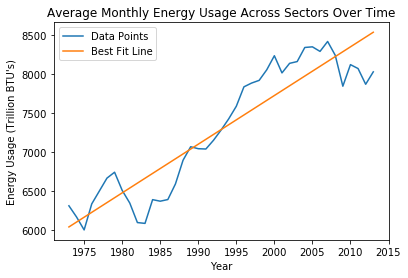

In [8]:
#Plot average monthly energy usage per year over time
avgs = getAvgs(climate_energy_data)
years = np.arange(1973, 2014)

graph(years, avgs, "Average Monthly Energy Usage Across Sectors Over Time", "Year", "Energy Usage (Trillion BTU's)")

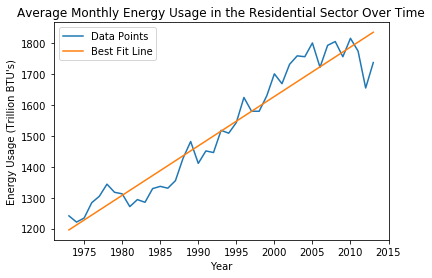

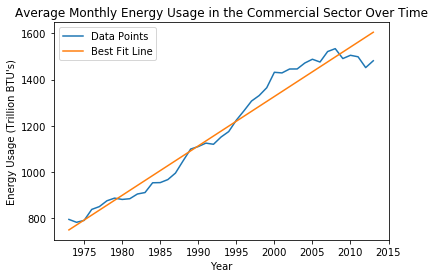

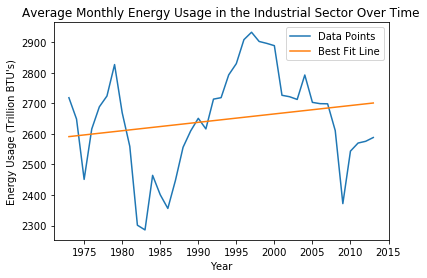

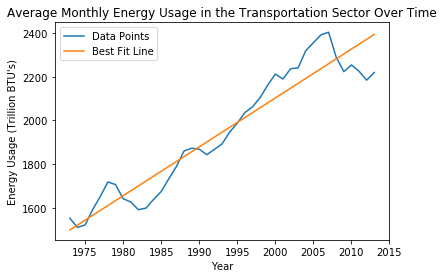

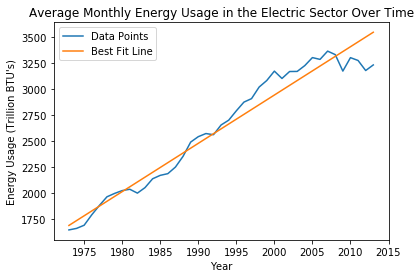

In [9]:
#Compute monthly averages for each individual sector
sectors = ["Residential", "Commercial", "Industrial", "Transportation", "Electric"]

for s in sectors:
    avgs = getAvgs(climate_energy_data, s)
    graph(years, avgs, "Average Monthly Energy Usage in the " + s + " Sector Over Time", "Year", 
          "Energy Usage (Trillion BTU's)")

In [10]:
climate_data = climate_data.set_index(['Date'])
climate_data.index.name = None

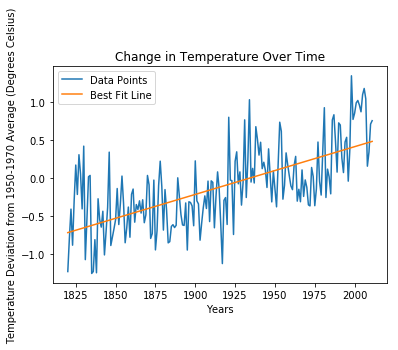

In [14]:
start = 1820
end = 2012
anomalies = np.zeros(end - start)
years = np.arange(start, end)

for y in range(start, end):
    d = str(y) + '-06'
    anomalies[y - start] = climate_data[d]['Annual Anomaly']

graph(years, anomalies, "Change in Temperature Over Time", "Years", 
      "Temperature Deviation from 1950-1970 Average (Degrees Celsius)")

In [16]:
from scipy import stats

stats.pearsonr(climate_energy_data['P.E. Total Consumption'], climate_energy_data['Monthly Anomaly'])

(0.30987579239266005, 2.4159757806075858e-12)